### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_1samp

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
import sys
import multiprocessing as mp
import pprint

print(sys.getrecursionlimit())
sys.setrecursionlimit(10001)

print("Number of processors: ", mp.cpu_count())

3000
Number of processors:  12


In [4]:
cd sgemm_product_dataset

C:\Users\abhis\Downloads\New folder\College\Course Materials\Sem 2\Applied Machine Learning\Assignments\Assignment 1\sgemm_product_dataset


In [5]:
data = pd.read_csv("sgemm_product.csv")
print(data.shape)
data.head()

(241600, 18)


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [6]:
data['Runtime'] = data[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].sum(axis = 1)/4

In [7]:
def normalizing(x):
    scaler = preprocessing.StandardScaler()
    x_scaled =pd.DataFrame(scaler.fit_transform(x))
    x_scaled.columns = x.columns
    return x_scaled

In [8]:
data_normalized = normalizing(data)
data_normalized.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Runtime
0,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,-1.0,-1.0,-0.277465,-0.275877,-0.268497,-0.275927,-0.274446
1,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,-1.0,1.0,-0.378085,-0.377918,-0.375101,-0.375228,-0.376589
2,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,1.0,-1.0,-0.373451,-0.371300,-0.371005,-0.370400,-0.371545
3,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,1.0,1.0,-0.361311,-0.346319,-0.354757,-0.357895,-0.355077
4,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,1.0,-1.0,-1.0,-0.277817,-0.259305,-0.257159,-0.278612,-0.268229


In [9]:
x_train ,x_test ,y_train , y_test = train_test_split(
    data_normalized.drop(columns = ['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)','Runtime']), 
    data_normalized['Runtime'], test_size=0.3,  random_state=100)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

c:\users\abhis\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Linear Regression

Defining the model calculation functions

In [10]:
def calc_m(m, alpha, x, y, length):
    return (m - alpha*(x.T @ (x @ m - y))/length)

In [11]:
def calc_cost(m, x, y, length):
    return sum((x @ m - y)**2)/(2*length)

In [12]:
def grad_desc(x, y, length, m, alpha, iters, costs, threshold = 0):
    
    for i in range(0,iters):
        cost = calc_cost(m, x, y, length)[0]
        costs.append(cost)
        m = calc_m(m, alpha, x, y, length)
        if i > 1 and (costs[len(costs) - 2] - costs[len(costs) - 1] <= threshold):
            break
    return [m, costs, i]
    

Fitting the model for an initial alpha of 0.015, with 3500 iterations and not checking for any thresholds in the drop of costs

In [14]:
np.random.seed(0)
x = np.array(x_train)
y = np.array(y_train)
m = np.random.rand(x.shape[1],1)
alpha = 0.015
iters = 15000

In [15]:
betas = grad_desc(x, y, len(x), m, alpha, iters, [])

Calculating the model parameters

In [56]:
def model_parameters(coeff, x, y):
    
    err = np.subtract(y, x@coeff)
    #Calculating R2 = 1 - sse/sst    
    sse = np.sum(err**2)
    sst = np.sum((y - np.mean(y, axis = 0))**2)
    r2 = 1 - (sse[0]/sst[0])
    print("R2 of the estimated model: {}".format(r2))
    
    
    #Calculating Adj R2 = 1 - (1 - r2)*(n - 1)/(n - k - 1)
    adj_r2 = 1 - (1 - r2)*(len(x) - 1)/(len(x) - len(coeff) - 1)
    print("Adjusted R2 of the estimated model: {}".format(adj_r2))
    
    #variable name, coeff, p val, t - stat, std errors
    model_output = pd.DataFrame(columns = ['Variable', 'Coeff', 'Std Err', 'T- Val'])
    df = len(x) - len(coeff) - 1
    x_terms = np.sum(np.subtract(x, np.mean(x, axis = 0))**2, axis = 0)
    for i in range(0, len(coeff)):
        se = math.sqrt(sse[0]/df)/math.sqrt(x_terms[i] + sys.float_info.epsilon)
        t  =coeff[i]/se
        model_output.loc[i] = [x_terms.index[i], coeff[i][0], se, t[0]]
    print('Model Output:\n')
    print(model_output)
    
    #Mean Absolute Error
    mae = np.sum(abs(err))/len(x)
    print('\nMean Absolute Error: {}'.format(mae[0]))
    
    #Mean Squared Error
    mse = np.sum(err**2)/len(x)
    print('Mean Squared Error: {}'.format(mse[0]))
    
    #Mean Absolute Percentage Error
    mape = 100 * np.sum(abs(1-err/y))/len(x)
    print("Mean Absolute Percentage Error: {}%".format(mape[0]))
    
    #Root Mean Squared Error
    rmse = math.sqrt(np.sum(err**2)/len(x))
    print("Root Mean Squared Error: {}".format(rmse))

In [63]:
model_parameters(betas[0], x_train, y_train)

R2 of the estimated model: 0.4068957777988651
Adjusted R2 of the estimated model: 0.4068431677876707
Model Output:

   Variable     Coeff       Std Err        T- Val
0     const  0.001343  5.181112e+07  2.592144e-11
1       MWG  0.381875  1.878062e-03  2.033348e+02
2       NWG  0.354979  1.876522e-03  1.891684e+02
3       KWG  0.111514  1.877123e-03  5.940700e+01
4     MDIMC -0.355647  1.872333e-03 -1.899487e+02
5     NDIMC -0.350679  1.876451e-03 -1.868842e+02
6     MDIMA  0.027151  1.875658e-03  1.447522e+01
7     NDIMB  0.028465  1.876924e-03  1.516552e+01
8       KWI  0.032238  1.877354e-03  1.717201e+01
9       VWM -0.005934  1.878165e-03 -3.159715e+00
10      VWN -0.016586  1.881904e-03 -8.813218e+00
11     STRM -0.011838  1.877352e-03 -6.305722e+00
12     STRN  0.000031  1.877357e-03  1.669561e-02
13       SA  0.052275  1.877352e-03  2.784516e+01
14       SB  0.064890  1.877352e-03  3.456450e+01

Mean Absolute Error: 0.47972895659654735
Mean Squared Error: 0.5959984164340649
Mea

Final cost: 0.29799920821702885



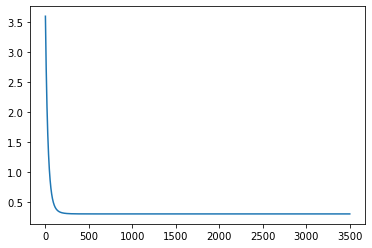

In [64]:
plt.plot(betas[1])
print('Final cost: {}\n'.format(betas[1][len(betas[1]) - 1]))

### Comparing with inbuilt ols regressor

In [66]:
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Runtime   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     8287.
Date:                Tue, 11 Feb 2020   Prob (F-statistic):               0.00
Time:                        05:45:09   Log-Likelihood:            -1.9621e+05
No. Observations:              169120   AIC:                         3.924e+05
Df Residuals:                  169105   BIC:                         3.926e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.002      0.715      0.474      -0.002       0.005
MWG            0.3819      0.002    182.493      0.000       0.378       0.386
NWG            0.3550      0.002    169.978      0.000       0.351       0.359
KWG            0.1115      0.002     57.226      0.000       0.108       0.115
MDIMC         -0.3556      0.002   -173.791      0.000      -0.360      -0.352
NDIMC         -0.3507      0.002   -170.906      0.000      -0.355      -0.347
MDIMA          0.0272      0.002     13.405      0.000       0.023       0.031
NDIMB          0.0285      0.002     14.035      0.000       0.024       0.032
KWI            0.0322      0.002     17.172      0.000       0.029       0.036
VWM           -0.0059      0.002     -2.807      0.005      -0.010      -0.002
VWN           -0.0166      0.002     -7.840      0.000      -0.021      -0.012
STRM          -0.0118      0.002     -6.306      0.000      -0.016      -0.008
STRN        3.134e-05      0.002      0.017      0.987      -0.004       0.004
SA             0.0523      0.002     27.845      0.000       0.049       0.056
SB             0.0649      0.002     34.564      0.000       0.061       0.069
==============================================================================
Omnibus:                   128738.260   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2938587.785
Skew:                           3.526   Prob(JB):                         0.00
Kurtosis:                      22.165   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicting Y for test data

In [70]:
y_hat = x_test @ betas[0]
model_parameters(betas[0], x_test, y_test)

R2 of the estimated model: 0.40878395181005145
Adjusted R2 of the estimated model: 0.4086615704796964
Model Output:

   Variable     Coeff       Std Err        T- Val
0     const  0.001343  5.131145e+07  2.617386e-11
1       MWG  0.381875  2.837545e-03  1.345795e+02
2       NWG  0.354979  2.842988e-03  1.248611e+02
3       KWG  0.111514  2.840858e-03  3.925372e+01
4     MDIMC -0.355647  2.858047e-03 -1.244371e+02
5     NDIMC -0.350679  2.843234e-03 -1.233381e+02
6     MDIMA  0.027151  2.846054e-03  9.539718e+00
7     NDIMB  0.028465  2.841567e-03  1.001720e+01
8       KWI  0.032238  2.840067e-03  1.135112e+01
9       VWM -0.005934  2.837181e-03 -2.091677e+00
10      VWN -0.016586  2.824190e-03 -5.872702e+00
11     STRM -0.011838  2.840046e-03 -4.168263e+00
12     STRN  0.000031  2.840088e-03  1.103615e-02
13       SA  0.052275  2.840051e-03  1.840642e+01
14       SB  0.064890  2.840046e-03  2.284812e+01

Mean Absolute Error: 0.4764883673702025
Mean Squared Error: 0.5844844271148155
Mea

### Experiments with truth